### - Importing Libraries

In [296]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# STEP 1: Data Cleaning

### - Reading Data

In [297]:
leads = pd.read_csv('Leads.csv')

In [298]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [299]:
leads.shape

(9240, 37)

In [300]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [301]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### A few columns seem to have Missing Values disguised as 'Select'

In [302]:
leads.City.replace('Select', np.NaN, inplace = True)
leads.Specialization.replace('Select', np.NaN, inplace = True)
leads['How did you hear about X Education'].replace('Select', np.NaN, inplace = True)

### Now let us see the true missing values

In [303]:
round((leads.isnull().sum()/leads.shape[0])*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping columns with more than 40% missing values

In [304]:
null_cols = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
             'Asymmetrique Profile Score','Asymmetrique Activity Score','How did you hear about X Education',]

In [305]:
leads.drop(null_cols, axis = 1, inplace = True)

### Checking for Binary Columns

In [306]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [307]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [308]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [309]:
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [310]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [311]:
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [312]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [313]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [314]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [315]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [316]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [317]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [318]:
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

### Dropping Highly Skewed Categorical Columns 

In [319]:
skewed_cols = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']

In [320]:
leads.drop(skewed_cols, axis = 1, inplace = True)

### Analysing Lead Source

In [321]:
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
WeLearn               0.010865
blog                  0.010865
welearnblog_Home      0.010865
testone               0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

#### The data is skewed as majority of the categories contribute to only less than 10%. Clubbing them together as 'Social Media' after treating missing values

In [322]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace = True)

In [323]:
for i in range(len(leads['Lead Source'])):
    if (leads['Lead Source'][i] != 'Google') and (leads['Lead Source'][i] != 'Direct Traffic') and (leads['Lead Source'][i] != 'Olark Chat') and (leads['Lead Source'][i] != 'Organic Search') and (leads['Lead Source'][i] != 'Reference'):
        leads['Lead Source'][i] = leads['Lead Source'][i].replace(leads['Lead Source'][i],'Social Media')

In [324]:
leads['Lead Source'].value_counts(normalize = True)*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
Name: Lead Source, dtype: float64

In [325]:
leads['Lead Source'].isnull().sum()

0

### Lead Source Missing values have been treated

### Analysing TotalVisits

In [326]:
leads['TotalVisits'].fillna(round(leads['TotalVisits'].median(),2), inplace = True)

In [327]:
leads['TotalVisits'].isnull().sum()

0

### TotalVisits Missing values have been treated

### Treating Page Views Per Visit similarly

In [328]:
leads['Page Views Per Visit'].fillna(round(leads['Page Views Per Visit'].median(),2), inplace = True)

In [329]:
leads['Page Views Per Visit'].isnull().sum()

0

### Page Views Per Visit Missing values have been treated

### Column City with 15% missing values, gives more information than the column Country which has 26% missing values. Retaining City and dropping Country

In [330]:
leads.drop(['Country'], axis = 1, inplace = True)

### Analysing City

In [331]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Here, we can treat Categories - Mumbai and Other Metro Cities - as Tier I, Thane & Outskirts as Tier II, and rest as Tier III

In [332]:
for i in range(len(leads)):
    if (leads.City[i] == 'Mumbai') or (leads.City[i] == 'Other Metro Cities'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier I Cities')
    if leads.City[i] == 'Thane & Outskirts':
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier II Cities')
    if (leads.City[i] == 'Other Cities') or (leads.City[i] == 'Other Cities of Maharashtra'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier III Cities')

In [333]:
leads.City.value_counts()

Tier I Cities      3602
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

In [334]:
leads.City.isnull().sum()

3669

In [335]:
# We still have to treat these missing values
# Imputing the missing values with mode

leads.City.fillna(leads.City.mode()[0], inplace = True)

In [336]:
leads.City.isnull().sum()

0

In [337]:
leads.City.value_counts()

Tier I Cities      7271
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

### City Missing values have been treated

In [338]:
leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [339]:
leads.Specialization.fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'Specialization', ascending = False)

In [208]:
### Following a similar approach like City to have the missing values distributed among the top three

In [340]:
random_Specialization = ['Finance Management','Human Resource Management', 'Marketing Management',
                         'Operations Management']

for i in range(len(leads)):
    if leads.Specialization[i] == 'XNA':
        var = random.choice(random_Specialization)
        leads.Specialization[i] = leads.Specialization[i].replace(leads.Specialization[i], var)

#### Clubbing all Categories other than Finance, HR, Marketing, and Operations into Other Category

In [341]:
for i in range(len(leads)):
    if (leads.Specialization[i] != 'Finance Management') and (leads.Specialization[i] != 'Human Resource Management') and (leads.Specialization[i] != 'Marketing Management') and (leads.Specialization[i] != 'Operations Management'):
        leads.Specialization[i] = 'Other'

In [342]:
leads['Specialization'].value_counts(normalize = True)*100

Other                        29.166667
Finance Management           19.945887
Marketing Management         18.268398
Human Resource Management    18.214286
Operations Management        14.404762
Name: Specialization, dtype: float64

In [343]:
leads['Specialization'].isnull().sum()

0

### Specialization has been treated

In [344]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [345]:
leads['What is your current occupation'].isnull().sum()

2690

In [347]:
leads['What is your current occupation'].fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'What is your current occupation', ascending = False)

In [348]:
random_occupation = ['Unemployed', 'Working Professional', 'Student']

for i in range(len(leads)):
    if leads['What is your current occupation'][i] == 'XNA':
        var = random.choice(random_occupation)
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], var)

In [349]:
leads['What is your current occupation'].value_counts()

Unemployed              6535
Working Professional    1602
Student                 1069
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Clubbing Housewife, Businessman into Other

In [350]:
for i in range(len(leads)):
    if (leads['What is your current occupation'][i] == 'Housewife') or (leads['What is your current occupation'][i] == 'Businessman'):
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], 'Other')

In [351]:
leads['What is your current occupation'].value_counts()

Unemployed              6535
Working Professional    1602
Student                 1069
Other                     34
Name: What is your current occupation, dtype: int64

In [352]:
leads['What is your current occupation'].isnull().sum()

0

## Occupation column has been treated

In [353]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### This column gives no information to us as all data points to "Better Career Prospects". Dropping this column

In [354]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### Checking other categorical columns for better understanding

In [355]:
leads['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### Clubbing Lead Import and Quick Add Form into Lead Add Form

In [356]:
for i in range(len(leads)):
    if (leads['Lead Origin'][i] == 'Lead Import') or (leads['Lead Origin'][i] == 'Quick Add Form'):
        leads['Lead Origin'][i] = leads['Lead Origin'][i].replace(leads['Lead Origin'][i], 'Lead Add Form')

In [357]:
leads['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: Lead Origin, dtype: float64

## Lead Origin has been treated

### Prospect ID and Lead Number convey the same information. Dropping Lead Number as this column is numeric

In [358]:
leads.drop(['Lead Number'], axis = 1, inplace = True)

### Let us convert 'A free copy of Mastering The Interview' to binary

In [359]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [360]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 2501 to 4204
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    5887 non-null   o

## Checking For Outliers

In [361]:
leads.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
90%,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,1.000000,10.000000,1562.000000,6.000000,1.000000
99%,1.000000,17.000000,1840.610000,9.000000,1.000000


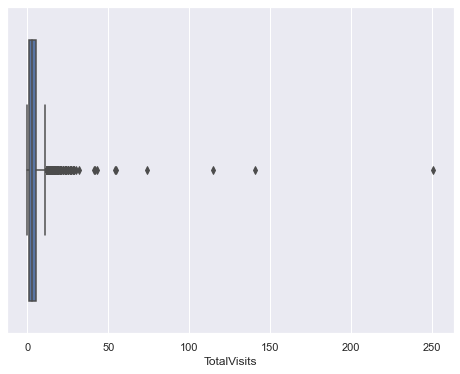

In [362]:
plt.figure(figsize = [8,6])
sns.boxplot('TotalVisits', data = leads)
plt.show()

### - We can see that Total Visits and Page Views Per Visit have outliers
- Assuming that a customer will not have visited the page more than 30 times

In [366]:
leads = leads[leads.TotalVisits < 30]

In [367]:
leads.shape

(9229, 15)

## Univariate Analysis

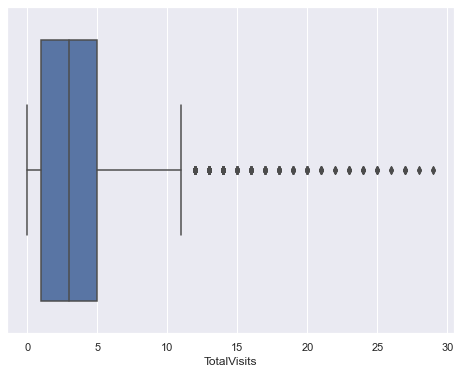

In [368]:
plt.figure(figsize = [8,6])
sns.boxplot('TotalVisits', data = leads)
plt.show()

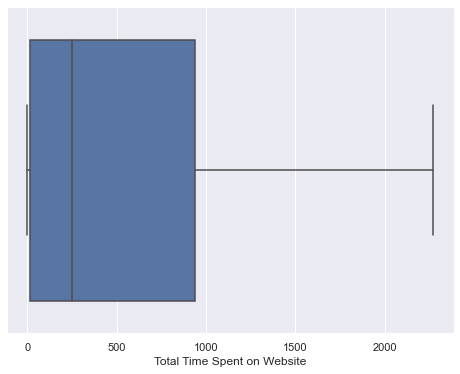

In [369]:
plt.figure(figsize = [8,6])
sns.boxplot('Total Time Spent on Website', data = leads)
plt.show()

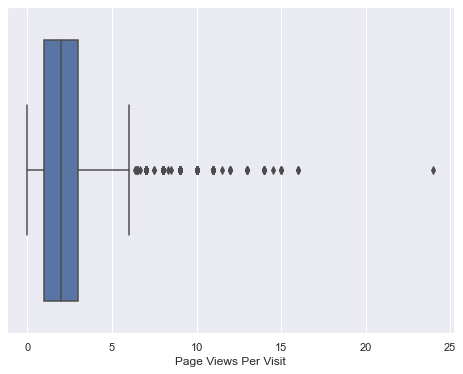

In [370]:
plt.figure(figsize = [8,6])
sns.boxplot('Page Views Per Visit', data = leads)
plt.show()

## Multivariate Analysis

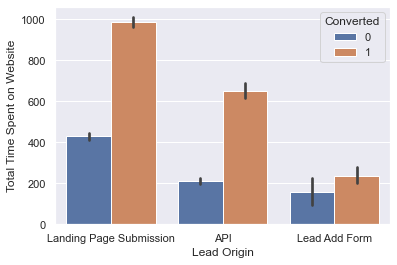

In [371]:
sns.set_theme()
sns.barplot(x = leads['Lead Origin'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.show()

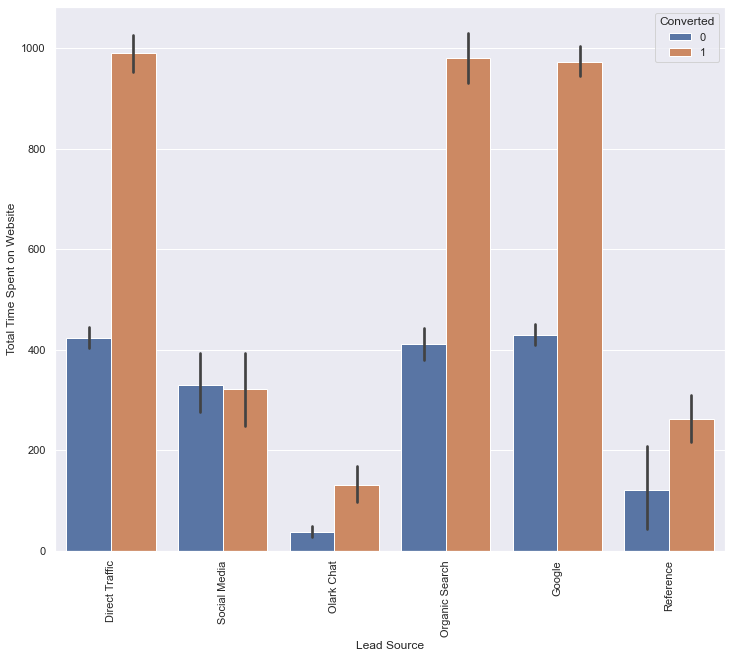

In [372]:
plt.figure(figsize = [12,10])
sns.set_theme()
sns.barplot(x = leads['Lead Source'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

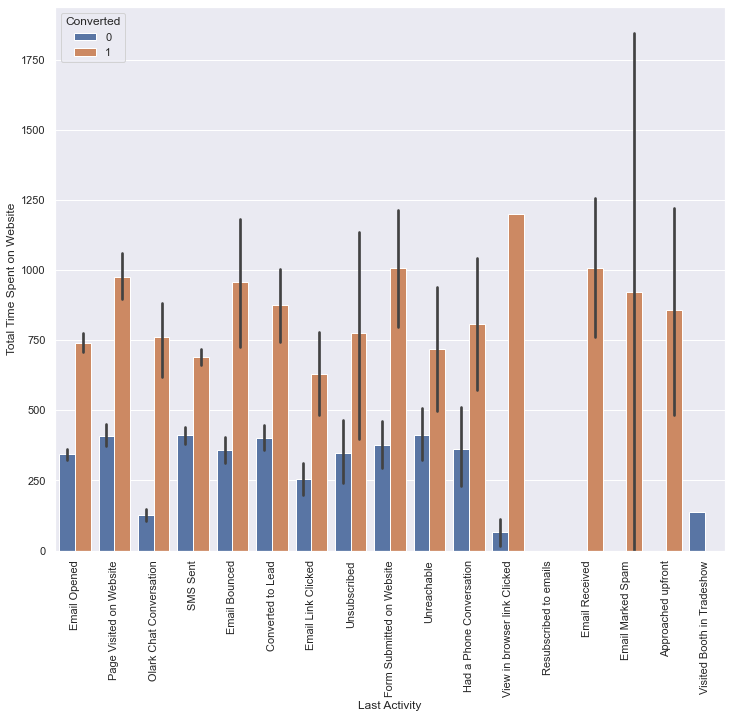

In [373]:
plt.figure(figsize = [12,10])
sns.set_theme()
sns.barplot(x = leads['Last Activity'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

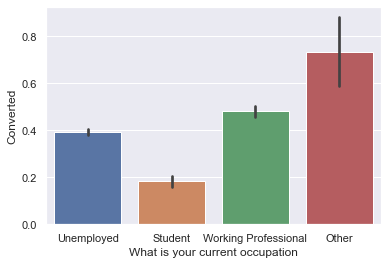

In [374]:
sns.set_theme()
sns.barplot(x = leads['What is your current occupation'], y = leads['Converted'])
plt.show()

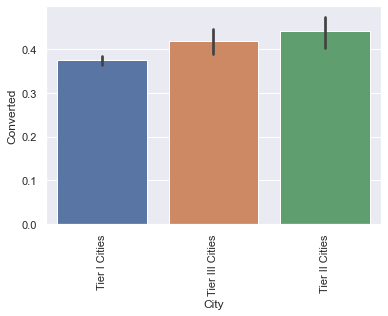

In [375]:
sns.set_theme()
sns.barplot(x = leads['City'], y = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

<Figure size 1728x1728 with 0 Axes>

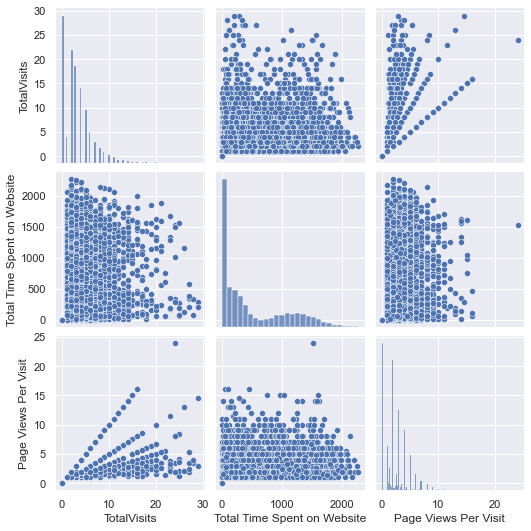

In [376]:
numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = [24,24])
sns.pairplot(leads[numerical_cols])
plt.show()

## Dropping the columns that are generated by the sales team which we do not need in our analysis

In [377]:
sales_cols = ['Last Activity','Lead Profile','Last Notable Activity','Tags']

In [378]:
leads.drop(sales_cols, axis = 1, inplace = True)

In [379]:
leads.shape

(9229, 11)

> # STEP 2: Data Preparation
    - Creating Dummies for Categorical Variables
    - Performing Train-Test Split
    - Performing Scaling

In [380]:
# Reassranging columns for seggregating categorical and numerical columns 

leads = leads[['Prospect ID','Lead Origin', 'Lead Source', 'Specialization',
                 'What is your current occupation','City','A free copy of Mastering The Interview',
                'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [381]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,Landing Page Submission,Direct Traffic,Operations Management,Unemployed,Tier I Cities,1,10.0,1395,5.0,0
7505,78318c39-6b46-4e70-a587-29837cee1b4e,Landing Page Submission,Social Media,Other,Student,Tier I Cities,1,12.0,1252,12.0,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,API,Olark Chat,Finance Management,Working Professional,Tier I Cities,0,0.0,0,0.0,0
624,ff8daf82-a795-4276-8443-67437cec918c,Landing Page Submission,Organic Search,Other,Student,Tier III Cities,1,3.0,145,3.0,0
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,Landing Page Submission,Direct Traffic,Other,Student,Tier I Cities,1,3.0,385,3.0,0


In [382]:
categorical_cols = ['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']

### Creating Dummies for Categorical columns

In [383]:
for col_name in categorical_cols:
    new_df = pd.get_dummies(leads[col_name], prefix = col_name, drop_first = True)
    leads = pd.concat([leads, new_df], axis = 1)
    leads.drop(col_name, axis = 1, inplace = True)

In [384]:
leads.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,1,10.0,1395,5.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7505,78318c39-6b46-4e70-a587-29837cee1b4e,1,12.0,1252,12.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
624,ff8daf82-a795-4276-8443-67437cec918c,1,3.0,145,3.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,1,3.0,385,3.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


### Performing Test-Train Split

In [385]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [386]:
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [387]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2765,8e5f90b6-cf07-4d59-a22a-bc3f34048b98,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7499,383d9485-5859-4e11-b9b7-31325357b4d3,0,0.068966,0.143926,0.083333,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,0,0.034483,0.529489,0.041667,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4635,288c7a59-3294-4e8f-89ec-c25620abfe24,1,0.103448,0.245599,0.125000,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5699,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### Confirming if all the values are now between 0 and 1

In [388]:
df_train.describe()

,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
count,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,...,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000
mean,0.313313,0.116510,0.218230,0.098172,0.388390,0.525697,0.082663,0.318885,0.186378,0.129721,...,0.037926,0.183591,0.182198,0.145046,0.293963,0.114241,0.706656,0.175232,0.090402,0.124923
std,0.463876,0.117510,0.243020,0.086358,0.487422,0.499378,0.275393,0.466081,0.389441,0.336023,...,0.191031,0.387181,0.386038,0.352175,0.455610,0.318129,0.455330,0.380195,0.286780,0.330657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034483,0.007042,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.103448,0.111796,0.083333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.172414,0.416813,0.125000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)

In [390]:
X_train.shape

(6460, 20)

In [391]:
y_train.shape

(6460,)

In [392]:
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [393]:
X_test.shape

(2769, 20)

In [394]:
y_test.shape

(2769,)

### Checking correlation between the numerical columns to understand the data better

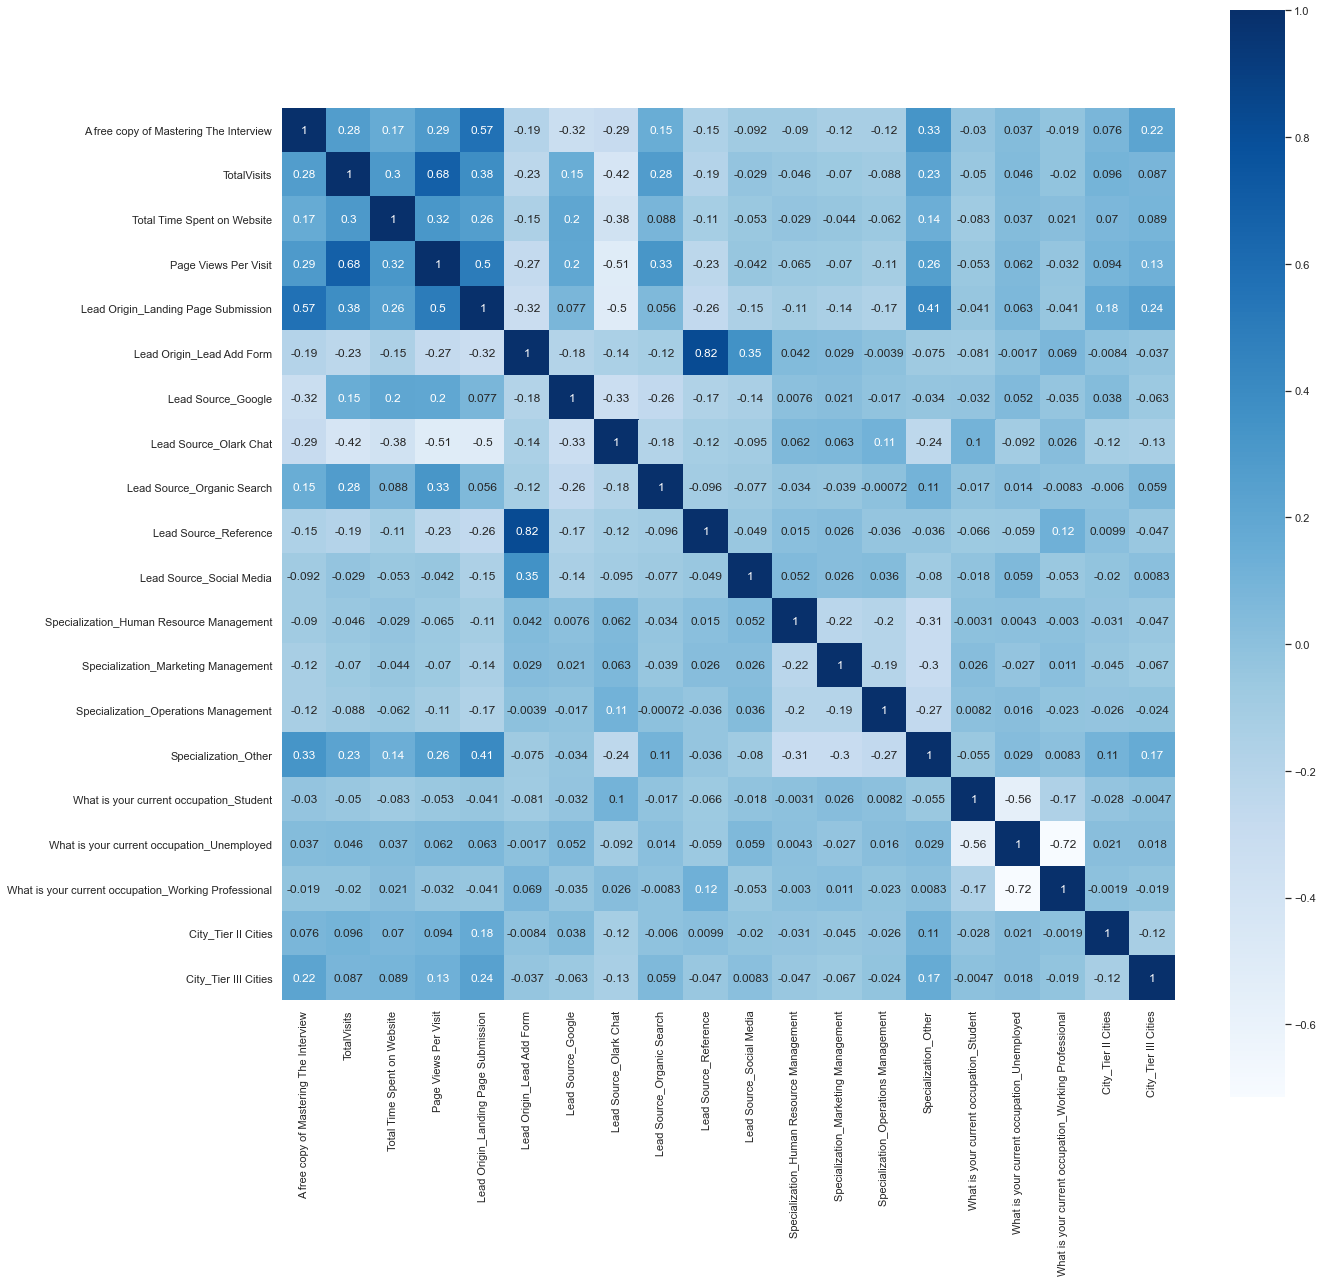

In [395]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

### - It is evident that there is high multicollinearity. Dropping the columns causing that

In [401]:
drop_cols = ['Lead Origin_Landing Page Submission','TotalVisits',
             'A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search']

In [262]:
# Here, some columns that have obvious relations - like being a student and being unemployed,
# or being a working professional v/s being unemployed have been omitted on purpose

In [398]:
# Dropping the columns to overcome multicollinearity

X_train.drop(drop_cols, axis = 1, inplace = True)

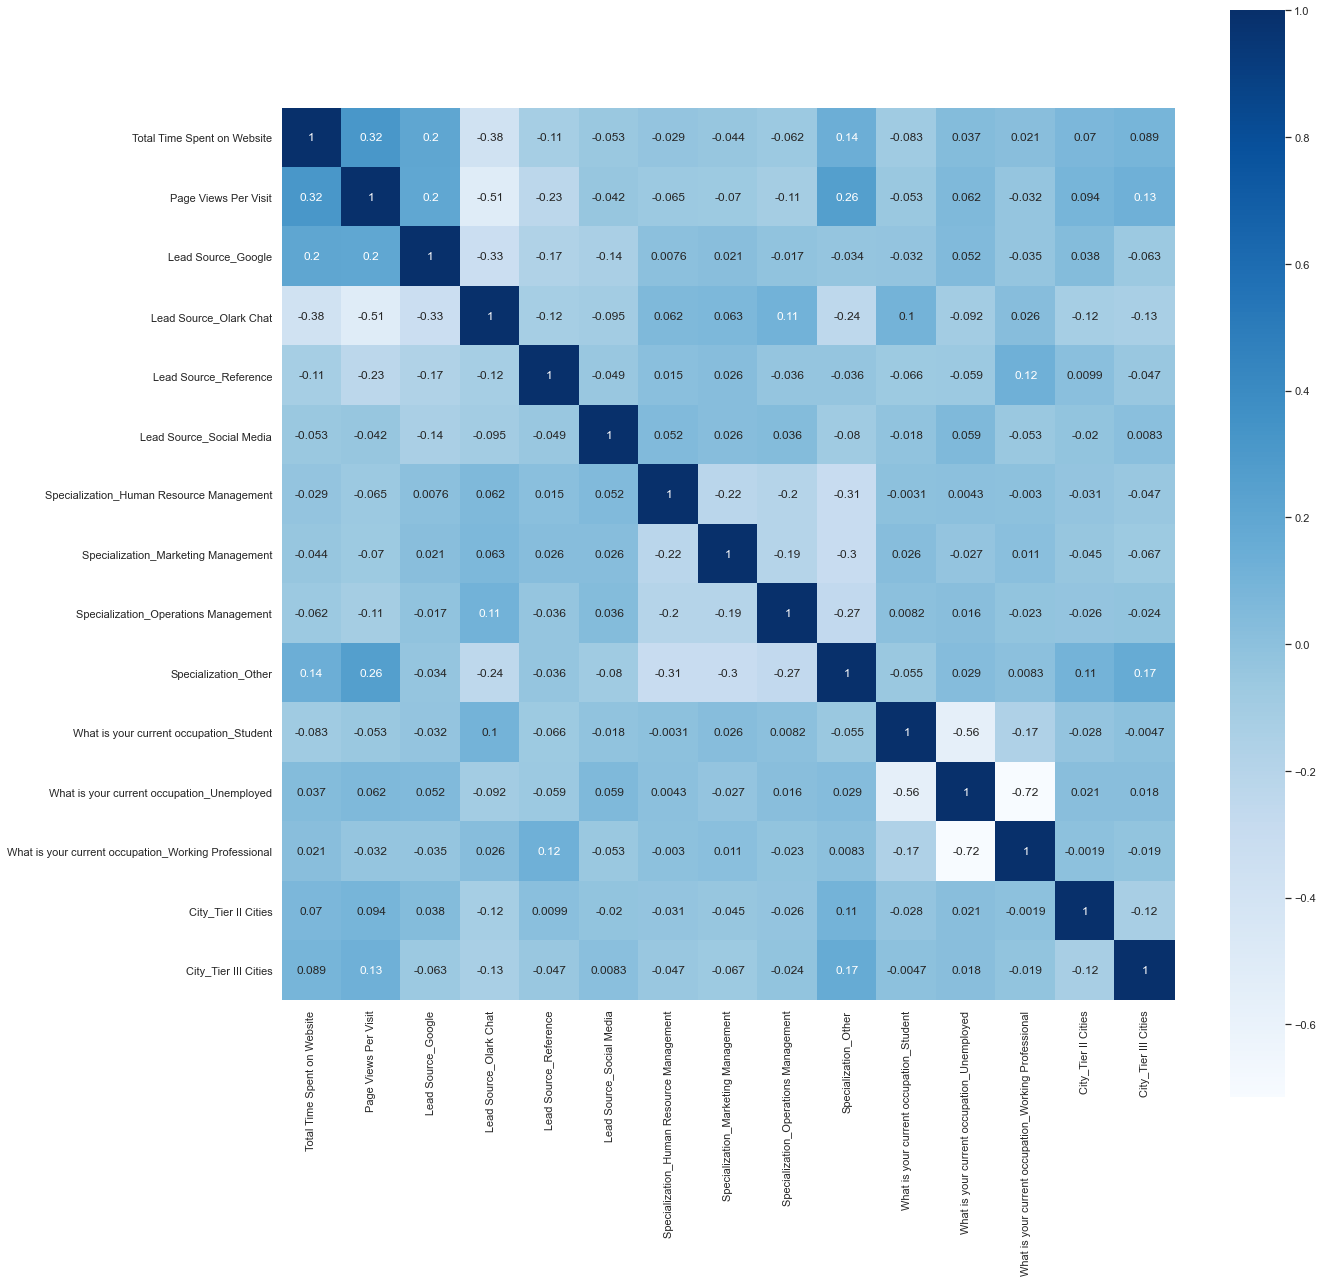

In [399]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

> # STEP 3: Modelling
    - Variable selection using RFE
    - Building a Logistic Model with good sensitivity
    - Check p-value and VIF
    - Find optimal probability cut-off
    - Check model performance over test data
    - Generate Score variable

In [400]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3366.8
Date:                Sun, 13 Jun 2021   Deviance:                       6733.6
Time:                        16:55:20   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1556      0.563     -0.276      0.782      -1.260       0.949
Total Time Spent on Website                              4.3072      0.145     29.636      0.000       4.022       4.592
Page Views Per Visit                                    -0.9422      0.437     -2.157      0.031      -1.798      -0.086
Lead Source_Google                                       0.3302      0.071      4.623      0.000       0.190       0.470
Lead Source_Olark Chat                                   0.7417      0.109      6.776      0.000       0.527       0.956
Lead Source_Reference                                    4.1486      0.219     18.966      0.000       3.720       4.577
Lead Source_Social Media                                 1.6305      0.153     10.672      0.000       1.331       1.930
Specialization_Human Resource Management                 0.0588      0.098      0.597      0.551      -0.134       0.252
Specialization_Marketing Management                      0.0444      0.099      0.449      0.653      -0.149       0.238
Specialization_Operations Management                     0.0296      0.105      0.281      0.779      -0.177       0.236
Specialization_Other                                     0.2365      0.092      2.579      0.010       0.057       0.416
What is your current occupation_Student                 -2.7268      0.565     -4.828      0.000      -3.834      -1.620
What is your current occupation_Unemployed              -1.8088      0.556     -3.255      0.001      -2.898      -0.720
What is your current occupation_Working Professional    -1.5314      0.559     -2.739      0.006      -2.627      -0.436
City_Tier II Cities                                      0.1320      0.106      1.249      0.212      -0.075       0.339
City_Tier III Cities                                     0.1613      0.093      1.742      0.081      -0.020       0.343
========================================================================================================================
"""

## Feature Selection using RFE

In [402]:
logreg = LogisticRegression()
rfe = RFE(logreg,12)
rfe = rfe.fit(X_train,y_train)

In [403]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True])

In [404]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Operations Management', False, 4),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Tier III Cities', True, 1)]

In [405]:
col = X_train.columns[rfe.support_]

In [406]:
X_train.columns[~rfe.support_]

Index(['Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management'],
      dtype='object')

### Assessing the model with statsmodel

In [407]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3367.0
Date:                Sun, 13 Jun 2021   Deviance:                       6734.0
Time:                        16:56:51   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1191      0.560     -0.213      0.832      -1.217       0.979
Total Time Spent on Website                              4.3080      0.145     29.643      0.000       4.023       4.593
Page Views Per Visit                                    -0.9396      0.436     -2.153      0.031      -1.795      -0.084
Lead Source_Google                                       0.3302      0.071      4.624      0.000       0.190       0.470
Lead Source_Olark Chat                                   0.7426      0.109      6.787      0.000       0.528       0.957
Lead Source_Reference                                    4.1488      0.219     18.981      0.000       3.720       4.577
Lead Source_Social Media                                 1.6347      0.153     10.713      0.000       1.336       1.934
Specialization_Other                                     0.2035      0.070      2.891      0.004       0.066       0.342
What is your current occupation_Student                 -2.7322      0.565     -4.835      0.000      -3.840      -1.625
What is your current occupation_Unemployed              -1.8129      0.556     -3.260      0.001      -2.903      -0.723
What is your current occupation_Working Professional    -1.5355      0.559     -2.745      0.006      -2.632      -0.439
City_Tier II Cities                                      0.1315      0.106      1.245      0.213      -0.075       0.339
City_Tier III Cities                                     0.1614      0.093      1.744      0.081      -0.020       0.343
========================================================================================================================
"""

### Let us drop the column with the highest p-value

In [408]:
col = col.drop('City_Tier II Cities')

In [409]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3367.8
Date:                Sun, 13 Jun 2021   Deviance:                       6735.6
Time:                        16:57:14   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1061      0.560     -0.190      0.850      -1.203       0.991
Total Time Spent on Website                              4.3113      0.145     29.668      0.000       4.027       4.596
Page Views Per Visit                                    -0.9245      0.436     -2.119      0.034      -1.780      -0.069
Lead Source_Google                                       0.3292      0.071      4.610      0.000       0.189       0.469
Lead Source_Olark Chat                                   0.7333      0.109      6.721      0.000       0.519       0.947
Lead Source_Reference                                    4.1489      0.219     18.985      0.000       3.721       4.577
Lead Source_Social Media                                 1.6301      0.153     10.689      0.000       1.331       1.929
Specialization_Other                                     0.2112      0.070      3.012      0.003       0.074       0.349
What is your current occupation_Student                 -2.7334      0.565     -4.842      0.000      -3.840      -1.627
What is your current occupation_Unemployed              -1.8138      0.556     -3.265      0.001      -2.903      -0.725
What is your current occupation_Working Professional    -1.5360      0.559     -2.749      0.006      -2.631      -0.441
City_Tier III Cities                                     0.1434      0.091      1.569      0.117      -0.036       0.323
========================================================================================================================
"""

In [410]:
col = col.drop('City_Tier III Cities')

In [414]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3373.3
Date:                Sun, 13 Jun 2021   Deviance:                       6746.7
Time:                        16:58:59   Pearson chi2:                 6.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.5942      0.109    -14.640      0.000      -1.808      -1.381
Total Time Spent on Website                    4.3149      0.145     29.726      0.000       4.030       4.599
Page Views Per Visit                          -0.8977      0.435     -2.063      0.039      -1.751      -0.045
Lead Source_Google                             0.3122      0.071      4.410      0.000       0.173       0.451
Lead Source_Olark Chat                         0.7136      0.108      6.579      0.000       0.501       0.926
Lead Source_Reference                          4.1285      0.218     18.922      0.000       3.701       4.556
Lead Source_Social Media                       1.6220      0.152     10.638      0.000       1.323       1.921
Specialization_Other                           0.2268      0.070      3.262      0.001       0.091       0.363
What is your current occupation_Student       -1.2237      0.126     -9.674      0.000      -1.472      -0.976
What is your current occupation_Unemployed    -0.3047      0.078     -3.914      0.000      -0.457      -0.152
==============================================================================================================
"""

In [412]:
col = col.drop('What is your current occupation_Working Professional')

In [415]:
X_train_sm = sm.add_constant(X_train[col])
res = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3373.3
Date:                Sun, 13 Jun 2021   Deviance:                       6746.7
Time:                        16:59:05   Pearson chi2:                 6.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.5942      0.109    -14.640      0.000      -1.808      -1.381
Total Time Spent on Website                    4.3149      0.145     29.726      0.000       4.030       4.599
Page Views Per Visit                          -0.8977      0.435     -2.063      0.039      -1.751      -0.045
Lead Source_Google                             0.3122      0.071      4.410      0.000       0.173       0.451
Lead Source_Olark Chat                         0.7136      0.108      6.579      0.000       0.501       0.926
Lead Source_Reference                          4.1285      0.218     18.922      0.000       3.701       4.556
Lead Source_Social Media                       1.6220      0.152     10.638      0.000       1.323       1.921
Specialization_Other                           0.2268      0.070      3.262      0.001       0.091       0.363
What is your current occupation_Student       -1.2237      0.126     -9.674      0.000      -1.472      -0.976
What is your current occupation_Unemployed    -0.3047      0.078     -3.914      0.000      -0.457      -0.152
==============================================================================================================
"""

### p-values are all below 0.05

In [416]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = ['VIF'], ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,3.12
1,Page Views Per Visit,2.83
0,Total Time Spent on Website,2.01
2,Lead Source_Google,1.65
6,Specialization_Other,1.53
3,Lead Source_Olark Chat,1.47
7,What is your current occupation_Student,1.33
5,Lead Source_Social Media,1.09
4,Lead Source_Reference,1.08


### VIF values are all below 4

## Assessing the Model

In [417]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2765    0.940539
7499    0.323934
709     0.659394
4635    0.326378
5699    0.940539
2247    0.582992
3371    0.647743
8175    0.456495
6318    0.279254
1337    0.323583
dtype: float64

In [418]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94053878, 0.32393446, 0.65939446, 0.32637843, 0.94053878,
       0.58299246, 0.64774285, 0.45649506, 0.27925414, 0.32358269])

In [419]:
y_train_pred_final = pd.DataFrame({'Hot_Lead':y_train.values, 'Hot_Lead_Prob': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
0,1,0.940539,2765
1,0,0.323934,7499
2,1,0.659394,709
3,1,0.326378,4635
4,1,0.940539,5699


In [420]:
y_train_pred_final = y_train_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
3885,1,0.998228,6712
6429,1,0.997041,8074
6271,1,0.996541,3478
6142,1,0.996459,1548
5417,1,0.996360,6383


## ROC Curve

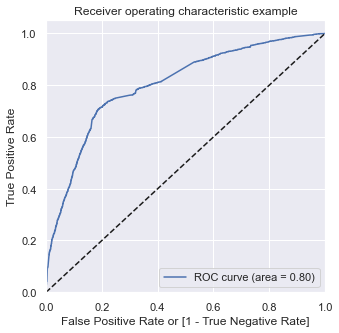

In [421]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

## Optimal Threshold

In [422]:
# Creating columns with probability cut-offs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3885,1,0.998228,6712,1,1,1,1,1,1,1,1,1,1
6429,1,0.997041,8074,1,1,1,1,1,1,1,1,1,1
6271,1,0.996541,3478,1,1,1,1,1,1,1,1,1,1
6142,1,0.996459,1548,1,1,1,1,1,1,1,1,1,1
5417,1,0.996360,6383,1,1,1,1,1,1,1,1,1,1


In [423]:
cutoff_df = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final[i])
    total = sum(sum(confusion))
    
    accuracy = (confusion[1,1] + confusion[0,0])/total
    sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.388390     1.000000     0.000000
0.1     0.1  0.415944     0.994022     0.048848
0.2     0.2  0.589164     0.920287     0.378891
0.3     0.3  0.754644     0.744520     0.761073
0.4     0.4  0.770279     0.686728     0.823336
0.5     0.5  0.750000     0.573535     0.862060
0.6     0.6  0.733901     0.470307     0.901291
0.7     0.7  0.707740     0.343962     0.938750
0.8     0.8  0.680650     0.218414     0.974184
0.9     0.9  0.660991     0.143483     0.989623


<Figure size 864x864 with 0 Axes>

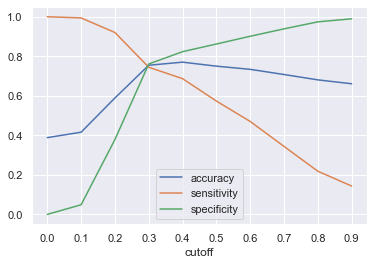

In [424]:
plt.figure(figsize = [12,12])
cutoff_df.plot.line(x = 'cutoff', y = ['accuracy','sensitivity','specificity'])
plt.xticks(numbers)
plt.show()

### Probability Threshold is 0.29 (closer to 0.3) But considering 0.25 to tradeoff sensitivity against accuracy

In [430]:
y_train_pred_final.Predicted = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [431]:
confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
confusion

array([[2485, 1466],
       [ 502, 2007]])

In [432]:
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
sensitivity*100

79.9920286966919

In [433]:
accuracy = metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
accuracy*100

69.53560371517028

In [434]:
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
specificity*100

62.89546950139206

> # Sensitivity for Training Dataset - 79.99%

## Precision and Recall

In [435]:
precision_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.5778865534120357

In [436]:
recall_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.7999202869669191

## Precision Recall Tradeoff

In [437]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

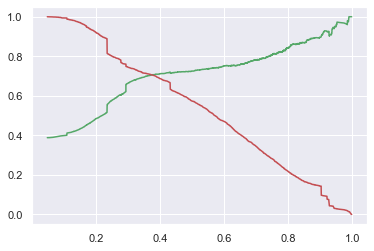

In [438]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

# Predicting on the test set

In [439]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) 

In [440]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed
442,0.028169,0.125000,0,0,0,1,0,0,1
9018,0.125000,0.083333,1,0,0,0,0,1,0
1841,0.125000,0.125000,1,0,0,0,0,0,1
2868,0.353433,0.083333,1,0,0,0,0,0,1
8910,0.061180,0.250000,0,0,0,0,0,0,1


In [441]:
X_test_sm = sm.add_constant(X_test)

In [442]:
y_test_pred = res.predict(X_test_sm)

In [443]:
y_test_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [444]:
y_test_df['Cust_ID'] = y_test_df.index

In [445]:
y_test_df.reset_index(drop = True, inplace = True)
y_test_1.reset_index(drop = True, inplace = True)

In [446]:
y_pred_final = pd.concat([y_test_1,y_test_df], axis = 1)

In [447]:
y_pred_final = y_pred_final.rename(columns = {0:'Hot_Lead_Prob'})

In [448]:
y_pred_final = y_pred_final[['Cust_ID','Converted','Hot_Lead_Prob']]

In [449]:
y_pred_final['Final_Predicted'] = y_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [450]:
y_pred_final = y_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)

In [451]:
y_pred_final

,Cust_ID,Converted,Hot_Lead_Prob,Final_Predicted
1871,3032,1,0.997384,1
1536,639,1,0.997162,1
2016,5293,1,0.996922,1
319,2656,1,0.996757,1
2477,4832,1,0.996054,1
...,...,...,...,...
623,5464,0,0.053886,0
84,9113,0,0.052764,0
287,4727,0,0.051795,0
1663,3573,0,0.047370,0


In [452]:
y_pred_final['Score'] = y_pred_final.Hot_Lead_Prob.apply(lambda x: round(x*100,2))

In [453]:
y_pred_final

,Cust_ID,Converted,Hot_Lead_Prob,Final_Predicted,Score
1871,3032,1,0.997384,1,99.74
1536,639,1,0.997162,1,99.72
2016,5293,1,0.996922,1,99.69
319,2656,1,0.996757,1,99.68
2477,4832,1,0.996054,1,99.61
...,...,...,...,...,...
623,5464,0,0.053886,0,5.39
84,9113,0,0.052764,0,5.28
287,4727,0,0.051795,0,5.18
1663,3573,0,0.047370,0,4.74


In [454]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1107,  611],
       [ 239,  812]])

In [458]:
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
accuracy_test*100

69.30299747201155

In [459]:
# sensitivity

sensitivity_test = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
sensitivity_test*100

77.25975261655566

In [460]:
# specificity

specificity_test = confusion2[0,0]/(confusion2[0,1]+confusion2[0,0])
specificity_test*100

64.43538998835857

> # Sensitivity for Testing Dataset - 77.25%

> # Difference between Sensitivity scores of Train and Test = 2.74%

> ### Features to be Considered:


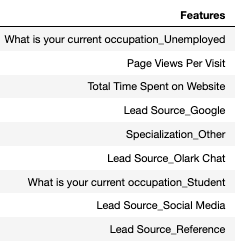

- If the lead is Unemployed and/or Student
- Source of the search
- How many times the lead visits the page/how many pages are viewed per visit
- Are the leads from Social Media
- Are the leads through a Reference

In [464]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "manalibhagwat/lead-scoring-case-study-c27-manali-bhagwat" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/manalibhagwat/lead-scoring-case-study-c27-manali-bhagwat


'https://jovian.ai/manalibhagwat/lead-scoring-case-study-c27-manali-bhagwat'